In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [81]:
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [82]:
df.index

Index([0, 1, 2, 3], dtype='int64')

In [83]:
df.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [84]:
df.describe()

,A,B,C,D
count,4.0,4,4.0,4.0
mean,1.0,2013-01-02 00:00:00,1.0,3.0
min,1.0,2013-01-02 00:00:00,1.0,3.0
25%,1.0,2013-01-02 00:00:00,1.0,3.0
50%,1.0,2013-01-02 00:00:00,1.0,3.0
75%,1.0,2013-01-02 00:00:00,1.0,3.0
max,1.0,2013-01-02 00:00:00,1.0,3.0
std,0.0,NaN,0.0,0.0


In [85]:
df.T

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [86]:
df.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2013-01-02,1.0
1,foo,train,3,1.0,2013-01-02,1.0
2,foo,test,3,1.0,2013-01-02,1.0
3,foo,train,3,1.0,2013-01-02,1.0


In [87]:
df.sort_values(by="B")

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [88]:
df.loc[:, ["A", "B"]]

,A,B
0,1.0,2013-01-02
1,1.0,2013-01-02
2,1.0,2013-01-02
3,1.0,2013-01-02


In [89]:
df.loc[0, "B"]

Timestamp('2013-01-02 00:00:00')

In [90]:
df.loc[3]

A                    1.0
B    2013-01-02 00:00:00
C                    1.0
D                      3
E                  train
F                    foo
Name: 3, dtype: object

In [38]:
df.iloc[3]

A                    1.0
B    2013-01-02 00:00:00
C                    1.0
D                      3
E                  train
F                    foo
Name: 3, dtype: object

In [40]:
df.iloc[[1, 2, 3], [0, 2]]

,A,C
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


In [41]:
df[df["A"] > 0]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [44]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.118121,-0.778071,0.602099,-0.618298,one
2013-01-02,0.636749,-0.934158,-1.473208,1.074588,one
2013-01-03,-1.344604,-0.664050,0.306150,-0.270171,two
2013-01-04,0.177780,-0.308357,0.647887,-0.465025,three
2013-01-05,0.521757,0.768940,0.188709,-0.255904,four
2013-01-06,-0.125940,-0.477933,0.511455,-0.119941,three


In [45]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.344604,-0.66405,0.306150,-0.270171,two
2013-01-05,0.521757,0.76894,0.188709,-0.255904,four


In [50]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,-0.118121,-0.778071,-0.602099,-0.618298
2013-01-02,-0.636749,-0.934158,-1.473208,-1.074588
2013-01-03,-1.344604,-0.664050,-0.306150,-0.270171
2013-01-04,-0.177780,-0.308357,-0.647887,-0.465025
2013-01-05,-0.521757,-0.768940,-0.188709,-0.255904
2013-01-06,-0.125940,-0.477933,-0.511455,-0.119941


In [52]:
pd.isna(df2)

,A,B,C,D
2013-01-01,False,False,False,False
2013-01-02,False,False,False,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


In [53]:
df.agg(lambda x: np.mean(x) * 5.6)

A   -0.015062
B   -2.234054
C    0.730887
D   -0.611101
dtype: float64

In [57]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2013-01-01,11.953804,-78.740746,60.932465,-62.571771
2013-01-02,64.438988,-94.536827,-149.088604,108.748300
2013-01-03,-136.073892,-67.201870,30.982349,-27.341312
2013-01-04,17.991367,-31.205721,65.566183,-47.060488
2013-01-05,52.801773,77.816691,19.097351,-25.897509
2013-01-06,-12.745155,-48.366797,51.759295,-12.138080


In [58]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [61]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df.groupby("A")[["C", "D"]].sum()
#df.groupby("A").agg({ "C" : "mean" , "D" : "sum" })

,C,D
A,,
bar,-1.777213,2.620849
foo,3.944753,1.892504


In [70]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df.head()
#pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

,A,B,C,D,E
0,one,A,foo,-0.193181,-0.102894
1,one,B,foo,-0.012625,0.245814
2,two,C,foo,-0.715589,1.472085
3,three,A,bar,1.591245,-1.872582
4,one,B,bar,0.739268,-0.448748


In [69]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"], aggfunc='sum')

C             bar       foo
A     B                    
one   A -0.212051  0.704271
      B  0.717016 -0.251517
      C  0.622774  0.246923
three A -0.448155       NaN
      B       NaN  1.072220
      C  0.162206       NaN
two   A       NaN -0.804924
      B  0.769049       NaN
      C       NaN  1.528722

In [71]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

<Axes: >

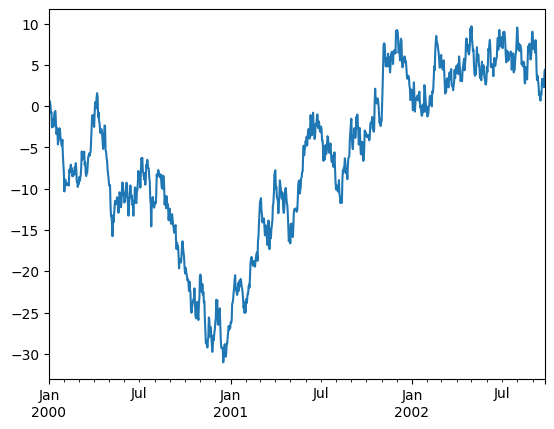

In [72]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

In [73]:
import pandas as pd
df = pd.DataFrame({'Weight': [45, 88, 56, 15, 71],
                   'Name': ['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
                   'Age': [14, 25, 55, 8, 21]})
index_ = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']
df.index = index_
print(df)

# return the dtype of each column
result = df.dtypes

# Print the result
print(result)

       Weight    Name  Age
Row_1      45     Sam   14
Row_2      88  Andrea   25
Row_3      56    Alex   55
Row_4      15   Robin    8
Row_5      71     Kia   21
Weight     int64
Name      object
Age        int64
dtype: object


In [78]:

# detect the missing values 
df.isna().astype(int) 

,Weight,Name,Age
Row_1,0,0,0
Row_2,0,0,0
Row_3,0,0,0
Row_4,0,0,0
Row_5,0,0,0


In [79]:
# Creating a dataframe using dictionary 
df = pd.DataFrame({"A":[-5, 8, 12, -9, 5, 3], 
                   "B":[-1, -4, 6, 4, 11, 3], 
                   "C":[11, 4, -8, 7, 3, -2]}) 
  
# Printing the data frame for visualization 

# Clip in range (-4, 9) 
df.clip(-4, 9)

,A,B,C
0,-4,-1,9
1,8,-4,4
2,9,6,-4
3,-4,4,7
4,5,9,3
5,3,3,-2


In [80]:
# importing pandas as pd
import pandas as pd

# Creating the DataFrame
df = pd.DataFrame({'Weight': [45, 88, 56, 15, 71],
				'Name': ['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
				'Age': [14, 25, 55, 8, 21]})

# Create the index
index_ = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']

# Set the index
df.index = index_

# Print the DataFrame
print("Original DataFrame:")
print(df)

# Corrected selection using loc for a specific cell
result = df.loc['Row_2', 'Name']

# Print the result
print("\nSelected Value at Row_2, Column 'Name':")
print(result)


Original DataFrame:
       Weight    Name  Age
Row_1      45     Sam   14
Row_2      88  Andrea   25
Row_3      56    Alex   55
Row_4      15   Robin    8
Row_5      71     Kia   21

Selected Value at Row_2, Column 'Name':
Andrea


In [5]:
# importing pandas package
import pandas as pd

# making data frame from csv file
data = pd.read_csv("nba.csv")

# sorting dataframe
data.sort_values("Team", inplace=True)

# making boolean series for a team name
filter1 = data["Team"] == "Atlanta Hawks"

# making boolean series for age
filter2 = data["Age"] > 24

# filtering data on basis of both filters
data.where(filter1 & filter2, inplace=True)

# display
data.head()



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35.0,6-4,190.0,Kansas,2854940.0
312,Al Horford,Atlanta Hawks,15.0,C,30.0,6-10,245.0,Florida,12000000.0


In [96]:
# importing pandas library
import pandas as pd
 
# creating and initializing a nested list
students = [['jack', 34, 'Sydeny', 'Australia',85.96],
            ['Riti', 30, 'Delhi', 'India',95.20],
            ['Vansh', 31, 'Delhi', 'India',85.25],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21],
            ['Maychan', 16, 'New York', 'US',99.63],
            ['Mike', 17, 'las vegas', 'US',47.28]]
 
# Create a DataFrame object
df = pd.DataFrame(students,
                      columns=['Name', 'Age', 'City', 'Country','Agg_Marks'],
                           index=['a', 'b', 'c', 'd', 'e', 'f'])
 
# here we set Float column 'Agg_Marks' as index of data frame 
# using dataframe.set_index() function
df = df.set_index('Agg_Marks')
 
 
# Displaying the Data frame
df

,Name,Age,City,Country
Agg_Marks,,,,
85.96,jack,34,Sydeny,Australia
95.20,Riti,30,Delhi,India
85.25,Vansh,31,Delhi,India
74.21,Nanyu,32,Tokyo,Japan
99.63,Maychan,16,New York,US
47.28,Mike,17,las vegas,US


In [1]:
# importing pandas package 
import pandas as pd 

# making data frame from csv file 
data = pd.read_csv("employees.csv") 

# setting first name as index column 
data.set_index(["First Name"], inplace = True, append = True, drop = True) 

# resetting index 
data.reset_index(inplace = True) 

# display 
data.head() 


,level_0,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
data.select_dtypes(include='int64').head()

,level_0,Salary
0,0,97308
1,1,61933
2,2,130590
3,3,138705
4,4,101004


In [5]:
data.select_dtypes(exclude='int64').head()

,First Name,Gender,Start Date,Last Login Time,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,1.389,True,Client Services


In [6]:
data['Salary'].where(data['Salary'] > 97308)

0           NaN
1           NaN
2      130590.0
3      138705.0
4      101004.0
         ...   
995    132483.0
996         NaN
997         NaN
998         NaN
999    129949.0
Name: Salary, Length: 1000, dtype: float64

In [7]:
data['Salary'].where(data['Salary'] > 97308, 0)

0           0
1           0
2      130590
3      138705
4      101004
        ...  
995    132483
996         0
997         0
998         0
999    129949
Name: Salary, Length: 1000, dtype: int64

In [8]:
data.Salary.pct_change()

0           NaN
1     -0.363536
2      1.108569
3      0.062141
4     -0.271807
         ...   
995    0.339917
996   -0.680019
997    1.286139
998   -0.375735
999    1.147917
Name: Salary, Length: 1000, dtype: float64

In [10]:
data['Gender'].value_counts()

Gender
Female    431
Male      424
Name: count, dtype: int64

In [15]:
import pandas as pd 
df = pd.DataFrame({ 
    'Name': ['Alice', 'Bob', 'Charlie'], 
    'Age': [25, 32, 37] 
}) 
for index, row in df.iterrows(): 
    print(f"Row {index} data:") 
    print(f"Name: {row['Name']}, Age: {row['Age']}")

Row 0 data:
Name: Alice, Age: 25
Row 1 data:
Name: Bob, Age: 32
Row 2 data:
Name: Charlie, Age: 37


In [13]:
result = df['Name'].str.contains('Al')
result

0     True
1    False
2    False
Name: Name, dtype: bool

In [109]:
import pandas as pd 
df = pd.DataFrame({ 
   'A': [1, 2, 2, 3, 4], 
   'B': [5, 6, 7, 8, 9], 
   'C': [1, 1, 1, 1, 1] 
}) 
df['A_rank'] = df['A'].rank() 
print(df)

   A  B  C  A_rank
0  1  5  1     1.0
1  2  6  1     2.5
2  2  7  1     2.5
3  3  8  1     4.0
4  4  9  1     5.0


In [110]:
df["D"] = df["A"].apply(lambda x: x * 3)
df

,A,B,C,A_rank,D
0,1,5,1,1.0,3
1,2,6,1,2.5,6
2,2,7,1,2.5,6
3,3,8,1,4.0,9
4,4,9,1,5.0,12


In [113]:
#It will convert the data type to a string of all the elements in the dataframe.
df = df.applymap(lambda x: str(x))
df.dtypes

C:\Users\diptiwar\AppData\Local\Temp\ipykernel_7848\3726778851.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x))


A         object
B         object
C         object
A_rank    object
D         object
dtype: object

In [115]:
rolling_avg = df["A"].rolling(window=2).mean()
rolling_avg

0    NaN
1    1.5
2    2.0
3    2.5
4    3.5
Name: A, dtype: float64

In [116]:
cross_tab = pd.crosstab(df["A"], df["B"])
cross_tab

B,5,6,7,8,9
A,,,,,
1,1,0,0,0,0
2,0,1,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [ ]:
Q1 = df["SALES"].quantile(0.25)
Q3 = df["SALES"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["SALES"] < lower_bound) | (df["SALES"] > upper_bound)]

#important pandas functions

In [11]:
data = {'Values': [10, 15, 20, 25, 30]}

df = pd.DataFrame(data)

expanding_sum = df['Values'].expanding(min_periods=1).sum()
expanding_sum

0     10.0
1     25.0
2     45.0
3     70.0
4    100.0
Name: Values, dtype: float64